In [52]:
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.axisbelow': True})

In [32]:
# Load regression results
results_path = "../data/output/question_analysis/regression_results.json"

with open(results_path, "r") as f:
    results = json.load(f)

print(f"Loaded results for {len(results['regression_results'])} outcomes")
print("Available outcomes:", [r['outcome'] for r in results['regression_results']])

Loaded results for 7 outcomes
Available outcomes: ['news_proportion_left_leaning', 'news_proportion_right_leaning', 'news_proportion_center_leaning', 'news_proportion_unknown_leaning', 'news_proportion_high_quality', 'news_proportion_low_quality', 'news_proportion_unknown_quality']


In [6]:
output_dir = Path("../data/output/question_analysis")

In [99]:
# Feature formatting functions (from the report script)

def get_topic_label_mapping():
    """Get mapping from topic variable names to human-readable labels."""
    return {
        "topic_0": "Topic: Guide to Selecting and Using AI Models",
        "topic_1": "Topic: Stock Prices and Market Volatility Today",
        "topic_2": "Topic: Diet, Nutrients, and Health-Related Medical Claims",
        "topic_3": "Topic: Latest News Updates Around the World",
        "topic_4": "Topic: FIFA World Cup Europe vs South America Finals",
        "topic_5": "Topic: Biographical Details of Internet Creators and Engineers",
        "topic_6": "Topic: Fictional Character Battle Analysis and Comparisons",
        "topic_7": "Topic: Cross Creek book summary and analysis",
        "topic_8": "Topic: Identifying and Sharing Song Lyrics from Quotes",
        "topic_9": "Topic: Dark Alternate Tails as Villain in Sonic",
        "topic_-1": "Topic: Outlier/Noise",
        "topic_0_prob": "Topic: AI models and technology",
        "topic_1_prob": "Topic: stock prices and market",
        "topic_2_prob": "Topic: diet, nutrients, and health",
        "topic_3_prob": "Topic: news updates",
        "topic_4_prob": "Topic: sports and entertainment",
        "topic_5_prob": "Topic: biography and personal stories",
        "topic_6_prob": "Topic: fictional character battle",
        "topic_7_prob": "Topic: online content and book",
        "topic_8_prob": "Topic: music and lyrics",
        "topic_9_prob": "Topic: comics and games",
    }

def format_feature_name(feature_name):
    """Format feature names for display, using topic labels where applicable."""
    topic_mapping = get_topic_label_mapping()

    if feature_name in topic_mapping:
        return topic_mapping[feature_name]

    # Handle other feature formatting
    if feature_name.startswith("embedding_pc_"):
        pc_num = feature_name.split("_")[-1]
        return f"Embedding PC {pc_num}"
    elif feature_name.startswith("client_country_"):
        country = feature_name.replace("client_country_", "")
        if country == "nan":
            return "Client country: unknown"
        if country == "Other":
            return "Client country: other"
        return f"Client country: {country}"
    elif feature_name.startswith("model_family_"):
        family = feature_name.replace("model_family_", "")
        return f"Model family: {family.title()}"
    elif feature_name.startswith("primary_intent_"):
        intent = feature_name.replace("primary_intent_", "")
        return f"Intent: {intent.lower()}"
    elif feature_name == "question_length_words_log":
        return "Question length (words, log Z-score)"
    elif feature_name == "response_word_count_log":
        return "Response length (words, log Z-score)"
    elif feature_name == "turn_number":
        return "Turn number"
    elif feature_name == "total_turns":
        return "Total turns"
    elif feature_name == "num_citations":
        return "Number of citations"
    elif feature_name == "proportion_news":
        return "News sources percentage"
    else:
        # Default formatting: replace underscores with spaces and title case
        return feature_name.replace("_", " ").title()

In [100]:
# Key outcomes to focus on for paper
key_outcomes = [
    "news_proportion_left_leaning",
    "news_proportion_right_leaning",
    "news_proportion_high_quality",
    "news_proportion_low_quality"
]

In [101]:
regression_coefficient_df = {}
for temp_result in results['regression_results']:
    features = temp_result['coefficients']['features']
    intercept = temp_result["coefficients"]["intercept"]
    intercept_dict = {
        "feature": "Intercept",
        "coefficient": intercept["coefficient"],
        "conf_int_lower": intercept["conf_int_lower"],
        "conf_int_upper": intercept["conf_int_upper"],
        "p_value": intercept["p_value"],
        "significant": True if intercept["p_value"] < 0.05 else False
    }
    all_features = [intercept_dict] + features
    temp_df = pd.DataFrame(all_features)
    temp_df['feature_name'] = temp_df.feature.apply(format_feature_name)
    temp_df.set_index("feature", inplace=True)
    regression_coefficient_df[
        temp_result['outcome']
    ] = temp_df

In [102]:
temp_df.head()

,coefficient,conf_int_lower,conf_int_upper,p_value,significant,std_error,t_value,feature_name
feature,,,,,,,,
Intercept,24.380995,20.771477,27.990514,1.194577e-39,True,NaN,NaN,Intercept
embedding_pc_1,-5.744871,-6.630408,-4.859335,9.826946e-37,True,0.451752,-12.716862,Embedding PC 1
embedding_pc_6,4.039241,3.288167,4.790315,7.808093e-26,True,0.383157,10.542007,Embedding PC 6
embedding_pc_4,4.265373,3.377799,5.152948,5.619028e-21,True,0.452792,9.420163,Embedding PC 4
embedding_pc_10,3.199122,2.494133,3.904110,6.957718e-19,True,0.359646,8.895186,Embedding PC 10


In [103]:
features_to_show = [
    'Intercept',
    # 'client_country_BR',
 # 'client_country_CA',
 # 'client_country_CN',
 # 'client_country_DE',
 # 'client_country_GB',
 # 'client_country_HK',
 # 'client_country_IN',
 # 'client_country_MX',
 # 'client_country_Other',
 # 'client_country_RU',
 # 'client_country_nan',
 # 'embedding_pc_0',
 # 'embedding_pc_1',
 # 'embedding_pc_10',
 # 'embedding_pc_11',
 # 'embedding_pc_12',
 # 'embedding_pc_13',
 # 'embedding_pc_14',
 # 'embedding_pc_15',
 # 'embedding_pc_16',
 # 'embedding_pc_17',
 # 'embedding_pc_18',
 # 'embedding_pc_19',
 # 'embedding_pc_2',
 # 'embedding_pc_3',
 # 'embedding_pc_4',
 # 'embedding_pc_5',
 # 'embedding_pc_6',
 # 'embedding_pc_7',
 # 'embedding_pc_8',
 # 'embedding_pc_9',
     'model_family_google',
     'model_family_openai',
#     'num_citations',
     'primary_intent_Analysis',
     'primary_intent_Creative Generation',
     'primary_intent_Explanation',
     'primary_intent_Factual Lookup',
     'primary_intent_Guidance',
     'primary_intent_Info Synthesis',
     'primary_intent_Other',
     'primary_intent_Text Processing',
#     'proportion_news',
#     'question_length_words_log',
#     'response_word_count_log',
     'topic_0_prob',
     'topic_1_prob',
     'topic_2_prob',
     'topic_3_prob',
     'topic_4_prob',
     'topic_5_prob',
     'topic_6_prob',
     'topic_7_prob',
     'topic_8_prob',
     'topic_9_prob',
#     'total_turns',
#     'turn_number'
][::-1]

In [157]:
feature_group_size = [1, 2, 8, 10][::-1]
y_offset_list = []
for index, value in enumerate(feature_group_size):
    for x in range(value):
        #print(index, value, x)
        y_offset_list.append(index)
y_offset = np.asarray(y_offset_list) * 0.8

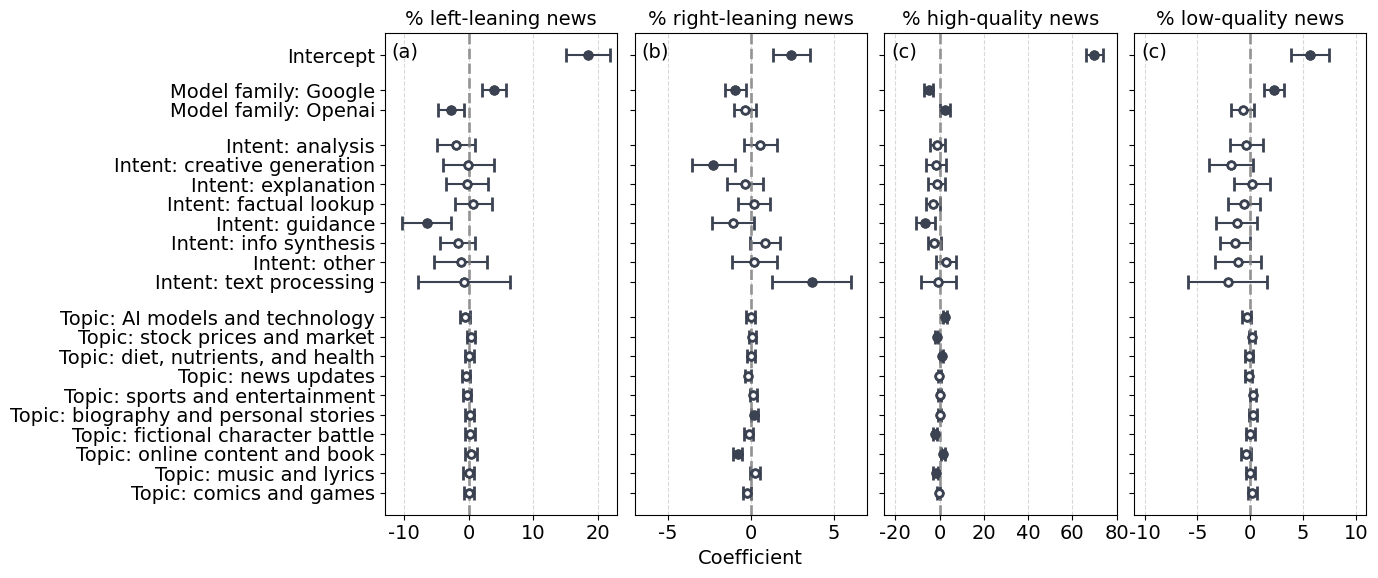

In [173]:
plt.figure(figsize=(14, 6))
for index, outcome, xlim, xs, title in [
    [1, "news_proportion_left_leaning", [-13, 23], [-10, 0, 10, 20], '% left-leaning news'],
    [2, "news_proportion_right_leaning", [-7, 7], [-5, 0, 5], '% right-leaning news'],
    [3, "news_proportion_high_quality", [-25, 80], [-20, 0, 20, 40, 60, 80], '% high-quality news'],
    [4, "news_proportion_low_quality", [-11, 11], [-10, -5, 0, 5, 10], '% low-quality news']
]:
    plt.subplot(1, len(key_outcomes), index)
    temp_df = regression_coefficient_df[outcome].loc[features_to_show]
    y_pos = np.arange(len(temp_df)) + y_offset
    plt.errorbar(
        temp_df['coefficient'],
        y_pos,
        xerr = [
            temp_df['coefficient'] - temp_df['conf_int_lower'],
            temp_df['conf_int_upper'] - temp_df['coefficient']
        ],
        fmt="o",
        capsize=5,
        capthick=2,
        color="black",
        ecolor="#3B4252",
    )
    for ys, coeff, sig in zip(y_pos, temp_df["coefficient"], temp_df["significant"]):
        color = "#3B4252" if sig else "white"
        plt.scatter(
            coeff, ys, color=color, edgecolor="#3B4252", s=30, zorder=3, linewidths=2)
    plt.title(title, fontsize=14)
    plt.xlim(xlim)
    if index == 2:
        plt.xlabel("Coefficient")
    if xs is not None:
        plt.xticks(xs, xs)
    if index == 1:
        plt.yticks(y_pos, temp_df.feature_name);
    else:
        plt.yticks(y_pos, [])
    plt.axvline(x=0, color="gray", linestyle="--", alpha=0.8, linewidth=2)
    plt.gca().xaxis.grid(True, alpha=0.3, linestyle="--", color='gray')
    plt.text(0.03, 0.95, f"({'abcc'[index-1]})", transform = plt.gca().transAxes)
plt.tight_layout(w_pad=0)
plt.savefig("../data/output/question_analysis/regression_coefficients.pdf")

In [174]:
# Summary table of model performance for paper
def create_performance_summary_for_paper(results):
    """Create a clean performance summary table for the paper."""

    performance_data = []

    for result in results["regression_results"]:
        if result["outcome"] in key_outcomes:
            perf = result["model_performance"]

            # Count significant features (excluding embeddings)
            sig_features = [
                f for f in result["coefficients"]["features"]
                if f["significant"]
                and not f["feature"].startswith("embedding_dim_")
                and not f["feature"].startswith("embedding_pc_")
            ]

            # Format outcome name
            outcome_formatted = result["outcome"].replace("_", " ").replace("news proportion", "News Proportion").title()

            performance_data.append({
                "Outcome": outcome_formatted,
                "R²": f"{perf['r2']:.3f}",
                "Adj. R²": f"{perf['adj_r2']:.3f}",
                "F-statistic": f"{perf['f_statistic']:.1f}",
                "p-value": f"{perf['f_pvalue']:.2e}" if perf['f_pvalue'] < 0.001 else f"{perf['f_pvalue']:.3f}",
                "N Significant Features": len(sig_features),
                "Sample Size": f"{result['n_samples']:,}"
            })

    return pd.DataFrame(performance_data)

# Create and display the summary table
performance_summary = create_performance_summary_for_paper(results)
print("Model Performance Summary for Paper:")
print("=" * 80)
print(performance_summary.to_string(index=False))

# Save the table as CSV for easy inclusion in LaTeX
csv_path = f"{output_dir}/model-performance-summary.csv"
performance_summary.to_csv(csv_path, index=False)
print(f"\nPerformance summary saved to: {csv_path}")

Model Performance Summary for Paper:
                      Outcome    R² Adj. R² F-statistic   p-value  N Significant Features Sample Size
 News Proportion Left Leaning 0.121   0.115        21.8 5.71e-207                      11       9,098
News Proportion Right Leaning 0.063   0.057        10.6  5.02e-89                       9       9,098
 News Proportion High Quality 0.126   0.121        23.0 6.30e-219                      17       9,098
  News Proportion Low Quality 0.047   0.041         7.9  1.78e-60                       4       9,098

Performance summary saved to: ../data/output/question_analysis/model-performance-summary.csv


In [ ]:
def create_latex_regression_table(results, outcomes_to_include):
    """Create a LaTeX table with regression coefficients for multiple outcomes."""
    
    # Get all unique features across the specified outcomes
    all_features = set()
    outcome_data = {}
    
    for result in results["regression_results"]:
        outcome = result["outcome"]
        if outcome in outcomes_to_include:
            outcome_data[outcome] = result
            
            # Add intercept
            all_features.add("Intercept")
            
            # Add significant features (excluding embeddings)
            for feature in result["coefficients"]["features"]:
                if (feature["significant"] and 
                    not feature["feature"].startswith("embedding_dim_") and 
                    not feature["feature"].startswith("embedding_pc_")):
                    all_features.add(feature["feature"])
    
    # Sort features for consistent ordering (intercept first)
    sorted_features = ["Intercept"] + sorted([f for f in all_features if f != "Intercept"])
    
    # Build coefficient data for each outcome
    coef_data = {}
    for outcome in outcomes_to_include:
        if outcome in outcome_data:
            result = outcome_data[outcome]
            coef_data[outcome] = {}
            
            # Add intercept
            intercept = result["coefficients"]["intercept"]
            coef_data[outcome]["Intercept"] = {
                "coefficient": intercept["coefficient"],
                "p_value": intercept["p_value"],
                "significant": intercept["p_value"] < 0.05
            }
            
            # Add features
            for feature in result["coefficients"]["features"]:
                if feature["feature"] in sorted_features:
                    coef_data[outcome][feature["feature"]] = {
                        "coefficient": feature["coefficient"],
                        "p_value": feature["p_value"],
                        "significant": feature["significant"]
                    }
    
    # Format outcome names for column headers
    def format_outcome_name(outcome):
        if outcome == "news_proportion_left_leaning":
            return "Left-Leaning"
        elif outcome == "news_proportion_right_leaning":
            return "Right-Leaning"
        elif outcome == "news_proportion_high_quality":
            return "High Quality"
        elif outcome == "news_proportion_low_quality":
            return "Low Quality"
        else:
            return outcome.replace("_", " ").title()
    
    # Start building LaTeX table
    latex_content = []
    
    # Table header
    latex_content.append("\\begin{table}[htbp]")
    latex_content.append("\\centering")
    latex_content.append("\\caption{Regression Coefficients for News Source Citation Patterns}")
    latex_content.append("\\label{tab:regression_coefficients}")
    
    # Column specification
    n_outcomes = len(outcomes_to_include)
    col_spec = "l" + "c" * n_outcomes
    latex_content.append(f"\\begin{{tabular}}{{{col_spec}}}")
    latex_content.append("\\toprule")
    
    # Header row
    header_row = "Feature"
    for outcome in outcomes_to_include:
        if outcome in outcome_data:
            header_row += f" & {format_outcome_name(outcome)}"
    header_row += " \\\\"
    latex_content.append(header_row)
    latex_content.append("\\midrule")
    
    # Add coefficient rows
    for feature in sorted_features:
        # Format feature name
        formatted_feature = format_feature_name(feature)
        
        # Check if this feature appears in any outcome
        appears_in_outcomes = [outcome for outcome in outcomes_to_include 
                             if outcome in coef_data and feature in coef_data[outcome]]
        
        if appears_in_outcomes:  # Only include if feature appears in at least one outcome
            row = formatted_feature.replace("&", "\\&")  # Escape ampersands
            
            for outcome in outcomes_to_include:
                if outcome in coef_data and feature in coef_data[outcome]:
                    coef_info = coef_data[outcome][feature]
                    coef_val = coef_info["coefficient"]
                    p_val = coef_info["p_value"]
                    
                    # Format coefficient with significance stars
                    if p_val < 0.001:
                        stars = "***"
                    elif p_val < 0.01:
                        stars = "**"
                    elif p_val < 0.05:
                        stars = "*"
                    else:
                        stars = ""
                    
                    # Format coefficient value
                    coef_str = f"{coef_val:.3f}{stars}"
                    row += f" & {coef_str}"
                else:
                    row += " & "  # Empty cell if feature not in this outcome
            
            row += " \\\\"
            latex_content.append(row)
    
    # Table footer
    latex_content.append("\\bottomrule")
    latex_content.append("\\end{tabular}")
    
    # Add notes
    latex_content.append("\\begin{tablenotes}")
    latex_content.append("\\small")
    latex_content.append("\\item Note: Coefficients show the relationship between features and news source citation patterns.")
    latex_content.append("\\item Statistical significance: *** p < 0.001, ** p < 0.01, * p < 0.05")
    latex_content.append(f"\\item Sample size: {outcome_data[outcomes_to_include[0]]['n_samples']:,} observations.")
    latex_content.append("\\item Only statistically significant features are shown.")
    latex_content.append("\\end{tablenotes}")
    latex_content.append("\\end{table}")
    
    return "\\n".join(latex_content)

# Create LaTeX table for key outcomes
latex_outcomes = [
    "news_proportion_left_leaning",
    "news_proportion_right_leaning", 
    "news_proportion_high_quality",
    "news_proportion_low_quality"
]

latex_table = create_latex_regression_table(results, latex_outcomes)

# Save to file
latex_path = f"{output_dir}/regression-coefficients-table.tex"
with open(latex_path, "w", encoding="utf-8") as f:
    f.write(latex_table)

print("LaTeX Regression Coefficients Table:")
print("=" * 80)
print(latex_table)
print("=" * 80)
print(f"LaTeX table saved to: {latex_path}")
print(f"You can include this in your paper with: \\input{{{latex_path}}}")